# Beer_type Prediction -  Data Preperation

The project is to deploy a Machine Learning model into production. I will train a custom neural networks model that will accurately predict a type of beer based on some rating criterias such as appearance, aroma, palate or taste. I will also build a web app and deploy it online in order to serve my model for real time predictions. This notebook is for data preperation only.

**Student Name:** Wenying Wu 

**Student Number:** 14007025

**Prerequisite:**
- Docker
- Cookie-cutter template folder
- Functions from lab exercise pasted in src folder

**Sections:**
1. EDA
2. Data Preperation


## 1. EDA on dataset

### 1.1 Load magic command

In [1]:
%load_ext autoreload
%autoreload 2

### 1.2 Import packages and data set

In [1]:
# Essientials for data manipulation
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Check working directory
!pwd

/home/jovyan/work/notebooks


In [3]:
# Read dataset in df
df = pd.read_csv('../data/raw/beer_reviews.csv')

### 1.3 EDA

In [4]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [5]:
df.shape

(1586614, 13)

In [6]:
df.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [8]:
df.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


**Note:** 57.7 beer_abv seems impossible, but according to research, there are a few beers with abv over 57.7. So data is deemed to be cleaned at this point.

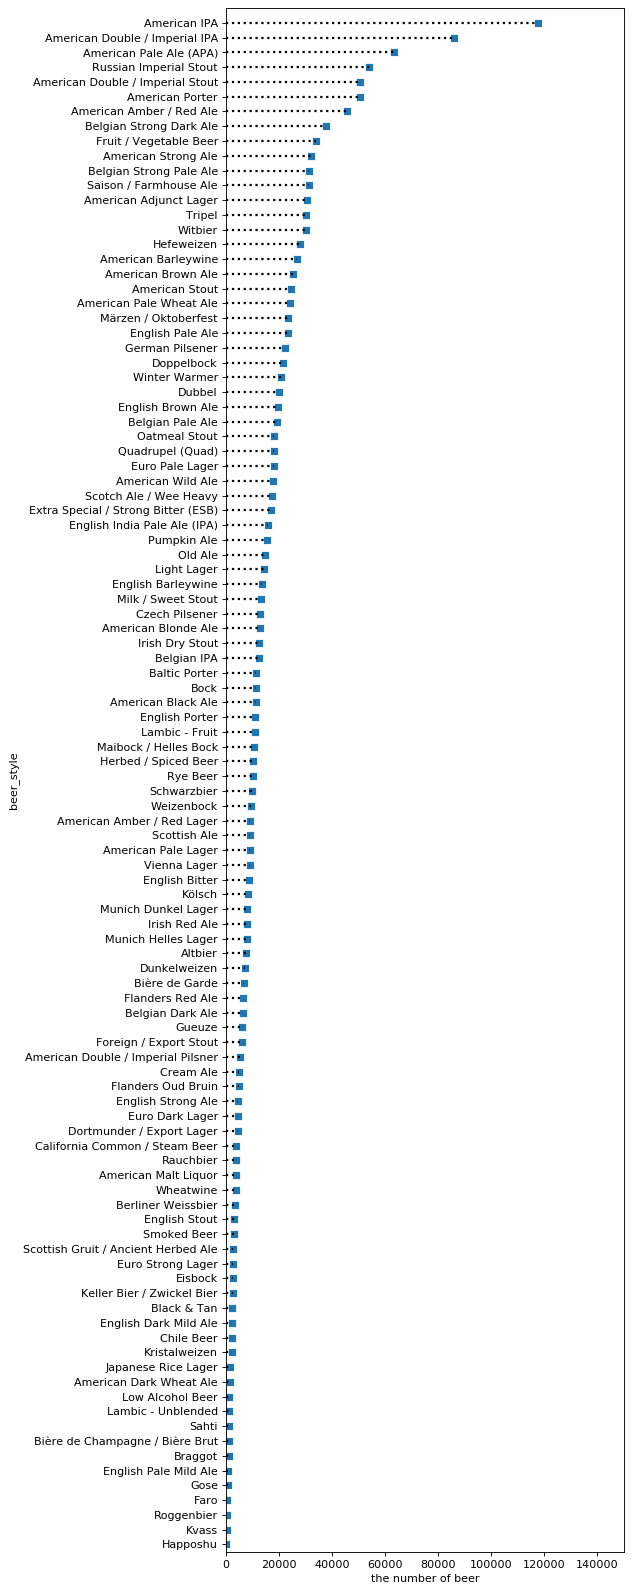

In [9]:
plot = df.groupby('beer_style').size().to_frame(name = 'ct').reset_index().sort_values(by=['ct'], ascending=True)

# Draw plot
fig, ax = plt.subplots(figsize=(8,20), dpi= 80)
plt.hlines(y=plot.beer_style, xmin=0, xmax=plot.ct, color='black', linewidth=2, linestyles='dotted')
ax = sns.scatterplot(x="ct", y="beer_style", data=plot, 
                     s = 60, marker="s")

ax.set_xlabel('the number of beer')
ax.set_xlim(0, 150000)
ax.set_ylim(-0.5,104)
plt.tight_layout()
plt.show();

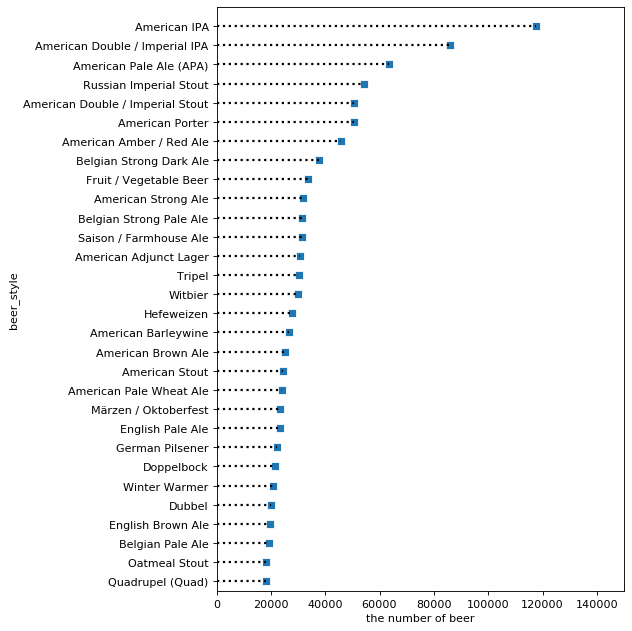

In [10]:
# the number of beer of beer_style (top 10) 
plot = df.groupby('beer_style').size().to_frame(name = 'ct').reset_index().sort_values(by=['ct'], ascending=True).tail(30)

# Draw plot
fig, ax = plt.subplots(figsize=(8,8), dpi= 80)
plt.hlines(y=plot.beer_style, xmin=0, xmax=plot.ct, color='black', linewidth=2, linestyles='dotted')
ax = sns.scatterplot(x="ct", y="beer_style", data=plot, 
                     s = 60, marker="s")

ax.set_xlabel('the number of beer')
ax.set_xlim(0, 150000)
ax.set_ylim(-0.5,30)
plt.tight_layout()
plt.show();

**Note:** Imbalanced dataset detected, SMOTE or other methods to improve model performance might required.

In [11]:
df['beer_style'].value_counts()

American IPA                        117586
American Double / Imperial IPA       85977
American Pale Ale (APA)              63469
Russian Imperial Stout               54129
American Double / Imperial Stout     50705
                                     ...  
Gose                                   686
Faro                                   609
Roggenbier                             466
Kvass                                  297
Happoshu                               241
Name: beer_style, Length: 104, dtype: int64

In [12]:
df['beer_style'].value_counts()/len(df)*100

American IPA                        7.411128
American Double / Imperial IPA      5.418898
American Pale Ale (APA)             4.000280
Russian Imperial Stout              3.411605
American Double / Imperial Stout    3.195799
                                      ...   
Gose                                0.043237
Faro                                0.038384
Roggenbier                          0.029371
Kvass                               0.018719
Happoshu                            0.015190
Name: beer_style, Length: 104, dtype: float64

**Note:** Highest percentage of a beer style is 7.4% and the lowest is 0.015%

**Check for categorical columns**

In [13]:
cat_cols = ['brewery_name', 'review_profilename', 'beer_style', 'beer_name']

In [14]:
from src.data.data_ast2 import show_cat_col_info
show_cat_col_info(df,cat_cols)

Column - brewery_name: 5743 unique values
['Vecchio Birraio' 'Caldera Brewing Company' 'Amstel Brouwerij B. V.' ...
 'Wissey Valley Brewery' 'Outback Brewery Pty Ltd'
 'Georg Meinel Bierbrauerei KG']

Column - review_profilename: 33388 unique values
['stcules' 'johnmichaelsen' 'oline73' ... 'hogshead' 'NyackNicky'
 'joeebbs']

Column - beer_style: 104 unique values
['Hefeweizen' 'English Strong Ale' 'Foreign / Export Stout'
 'German Pilsener' 'American Double / Imperial IPA' 'Herbed / Spiced Beer'
 'Light Lager' 'Oatmeal Stout' 'American Pale Lager' 'Rauchbier'
 'American Pale Ale (APA)' 'American Porter' 'Belgian Strong Dark Ale'
 'American IPA' 'American Stout' 'Russian Imperial Stout'
 'American Amber / Red Ale' 'American Strong Ale' 'Märzen / Oktoberfest'
 'American Adjunct Lager' 'American Blonde Ale' 'Euro Pale Lager'
 'English Brown Ale' 'Scotch Ale / Wee Heavy' 'Fruit / Vegetable Beer'
 'American Double / Imperial Stout' 'Belgian Pale Ale' 'English Bitter'
 'English Porter' 'Ir

**Check for null values**

In [15]:
df.isnull().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [16]:
df.brewery_name.isnull().sum()/len(df)*100

0.0009454095325012889

In [17]:
df.beer_abv.isnull().sum()/len(df)*100

4.272305677373325

Only small amount of data (around 4%) contains null value, given the total data amount is big enough, decide to drop these rows containing null value

### 1.4 EDA summary

From the Assignment breif, API Expected Parameter are: ['brewery_name', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv'].
All variables are numerical except for 'brewery_name' and no major data problem was found. Two minor problem was found and data will be cleaned accordingly:
- 'beer_abv' has values seems wrong (max=57.7): Research shown this value is possible, no cleaning required. 
- Around 4% null value was found in 'brewery_name' and 'beer_abv': these rows are to be deleted given the dataset is considerably big.

In [18]:
input_cols = ['brewery_name', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']
# feature to be predicted: 
target = 'beer_style'

**Columns that are not in input_cols except for the target 'beer_style' are to be dropped.**

In [19]:
cols_to_drop = [i for i in df.columns if i not in input_cols and i != target]
cols_to_drop

['brewery_id',
 'review_time',
 'review_overall',
 'review_profilename',
 'beer_name',
 'beer_beerid']

## 2. Prep Data

In [20]:
# Make a copy
df_cleaned = df.copy()

### 2.1 Drop null rows

In [21]:
df_cleaned = df_cleaned.dropna()

Check for shape and classification distribution

In [22]:
df_cleaned.shape

(1518478, 13)

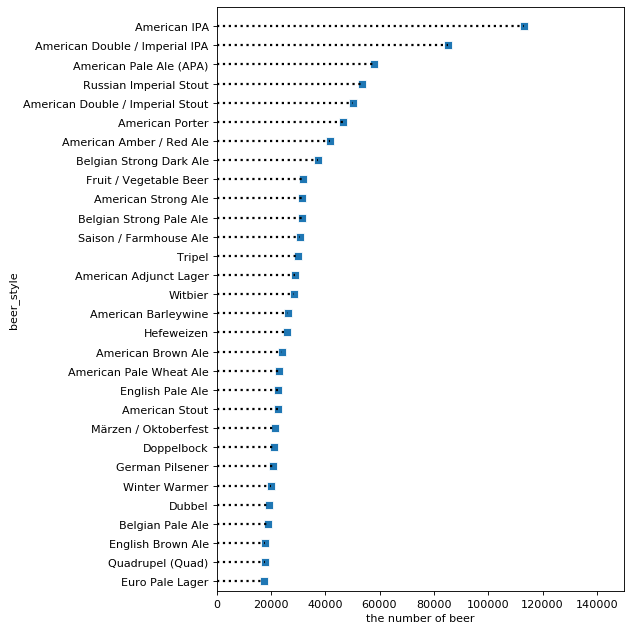

In [23]:
# the number of beer of beer_style (top 10) 
plot = df_cleaned.groupby('beer_style').size().to_frame(name = 'ct').reset_index().sort_values(by=['ct'], ascending=True).tail(30)

# Draw plot
fig, ax = plt.subplots(figsize=(8,8), dpi= 80)
plt.hlines(y=plot.beer_style, xmin=0, xmax=plot.ct, color='black', linewidth=2, linestyles='dotted')
ax = sns.scatterplot(x="ct", y="beer_style", data=plot, 
                     s = 60, marker="s")

ax.set_xlabel('the number of beer')
ax.set_xlim(0, 150000)
ax.set_ylim(-0.5,30)
plt.tight_layout()
plt.show();

Looks like the distribution is similar as the one before na rows are dropped.

### 2.2 Encode categorical columns

In [24]:
from src.data.data_ast2 import create_cats_dict, generate_cat_mapping_dict
cats_dict = create_cats_dict(df_cleaned,cat_cols)
# cats_dict is too long, not displaying here

Get category: number dictionary for later use

In [25]:
# get mapping of numerical and categotical value in dictionary format
brewery_name_dict = generate_cat_mapping_dict(df_cleaned,'brewery_name')
review_profilename_dict = generate_cat_mapping_dict(df_cleaned,'review_profilename')
beer_style_dict = generate_cat_mapping_dict(df_cleaned,'beer_style')
beer_name_dict = generate_cat_mapping_dict(df_cleaned,'beer_name')

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
# not using onehotencoding as there are too many categories, memory consumption is high
# try different scaler:Standard, Minmax and robust

In [27]:
cats_dict.keys()

dict_keys(['brewery_name', 'review_profilename', 'beer_style', 'beer_name'])

In [28]:
#save brewery_name label encoder for model deployment
from joblib import dump
brewery_name_encoder = LabelEncoder()
brewery_name_encoder.fit(df_cleaned['brewery_name'])
dump(brewery_name_encoder, '../models/brewery_name_encoder.joblib')

['../models/brewery_name_encoder.joblib']

In [29]:
# Use Label encoder instead of ordinal encoder because these variables are not ordinal
for col, cats in cats_dict.items():
    col_encoder = LabelEncoder()
    df_cleaned[col] = col_encoder.fit_transform(df_cleaned[[col]])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [30]:
df_cleaned.head(10)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,4886,1234817823,1.5,2.0,2.5,30121,65,1.5,1.5,34371,5.0,47986
1,10325,4886,1235915097,3.0,2.5,3.0,30121,51,3.0,3.0,32297,6.2,48213
2,10325,4886,1235916604,3.0,2.5,3.0,30121,59,3.0,3.0,5313,6.5,48215
3,10325,4886,1234725145,3.0,3.0,3.5,30121,61,2.5,3.0,34370,5.0,47969
4,1075,1360,1293735206,4.0,4.5,4.0,22693,9,4.0,4.5,8745,7.7,64883
5,1075,1360,1325524659,3.0,3.5,3.5,26755,66,3.0,3.5,8085,4.7,52159
6,1075,1360,1318991115,3.5,3.5,3.5,10055,66,4.0,4.0,8085,4.7,52159
7,1075,1360,1306276018,3.0,2.5,3.5,13759,66,2.0,3.5,8085,4.7,52159
8,1075,1360,1290454503,4.0,3.0,3.5,7575,66,3.5,4.0,8085,4.7,52159
9,1075,1360,1285632924,4.5,3.5,5.0,14188,66,4.0,4.0,8085,4.7,52159


### 2.3 Drop columns (defined in EDA)

In [31]:
#drop columns
df_cleaned = df_cleaned.drop(cols_to_drop, axis=1)

In [32]:
df_cleaned.shape

(1518478, 7)

In [33]:
df_cleaned

,brewery_name,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_abv
0,4886,2.0,2.5,65,1.5,1.5,5.0
1,4886,2.5,3.0,51,3.0,3.0,6.2
2,4886,2.5,3.0,59,3.0,3.0,6.5
3,4886,3.0,3.5,61,2.5,3.0,5.0
4,1360,4.5,4.0,9,4.0,4.5,7.7
...,...,...,...,...,...,...,...
1586609,4617,4.0,3.5,85,4.0,4.0,5.2
1586610,4617,5.0,2.5,85,2.0,4.0,5.2
1586611,4617,3.5,3.0,85,3.5,4.0,5.2
1586612,4617,4.5,4.5,85,4.5,4.5,5.2


In [34]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518478 entries, 0 to 1586613
Data columns (total 7 columns):
brewery_name         1518478 non-null int64
review_aroma         1518478 non-null float64
review_appearance    1518478 non-null float64
beer_style           1518478 non-null int64
review_palate        1518478 non-null float64
review_taste         1518478 non-null float64
beer_abv             1518478 non-null float64
dtypes: float64(5), int64(2)
memory usage: 92.7 MB


### 2.4 Standardise numerical columns

In [35]:
# Get a list of names of numerical columns
num_cols = [i for i in df_cleaned.columns]
num_cols.remove('beer_style')

Can test for effects of different scalers on later experiments

In [36]:
# sc = StandardScaler()
# sc = MinMaxScaler()
sc = RobustScaler(with_centering=True, 
                    with_scaling=True, 
                    quantile_range=(25.0, 75.0), 
                    copy=True)

In [37]:
df_cleaned[num_cols] = sc.fit_transform(df_cleaned[num_cols])

In [38]:
# save scaler
dump(sc, '../models/numeric_scaler.joblib')

['../models/numeric_scaler.joblib']

In [39]:
df_cleaned['beer_style'] = df_cleaned['beer_style'].astype(int)

In [40]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518478 entries, 0 to 1586613
Data columns (total 7 columns):
brewery_name         1518478 non-null float64
review_aroma         1518478 non-null float64
review_appearance    1518478 non-null float64
beer_style           1518478 non-null int64
review_palate        1518478 non-null float64
review_taste         1518478 non-null float64
beer_abv             1518478 non-null float64
dtypes: float64(6), int64(1)
memory usage: 92.7 MB


### 2.5 Split data and save

In [39]:
from src.data.sets import split_sets_random, save_sets

In [40]:
X_train, y_train, X_val, y_val, X_test, y_test = split_sets_random(df_cleaned, target_col='beer_style', test_ratio=0.2)

In [41]:
save_sets(X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test, path='../data/processed/')

Save dictionarys as well

In [42]:
from src.data.data_ast2 import save_dicts

In [43]:
save_dicts(brewery_name_dict=brewery_name_dict, beer_style_dict=beer_style_dict)